In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import os

C:\Users\JeannotMunganga\anaconda3\envs\Machine Learning PG\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [19]:
train_data_dir = 'assets/asl/asl_alphabet_train'
test_data_dir = 'assets/asl/asl_alphabet_test'

transform = transforms.Compose([
    transforms.Resize((75, 75)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = ImageFolder(root=train_data_dir, transform=transform)
test_dataset = ImageFolder(root=test_data_dir, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [29]:
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 9 * 9, 512)
        self.fc2 = nn.Linear(512, 29)  # 26 classes for ASL alphabet

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 9 * 9)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = ASLClassifier()

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct / total}")

Epoch 1/10, Loss: 0.4314809777532352
Epoch 2/10, Loss: 0.05136436375990802
Epoch 3/10, Loss: 0.03518279445521964
Epoch 4/10, Loss: 0.025132066129339426
Epoch 5/10, Loss: 0.023086960431774207
Epoch 6/10, Loss: 0.01757425634252038
Epoch 7/10, Loss: 0.017493409677741076
Epoch 8/10, Loss: 0.013642445029113359
Epoch 9/10, Loss: 0.013135112772930732
Epoch 10/10, Loss: 0.012540342524676217
Accuracy: 0.9285714285714286


In [33]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(75 * 75 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 29)

    def forward(self, x):
        x = x.view(-1, 75 * 75 * 3) 
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct / total}")

Epoch 1/10, Loss: 0.9521822388084902
Epoch 2/10, Loss: 0.3731231090522626
Epoch 3/10, Loss: 0.29450899601817054
Epoch 4/10, Loss: 0.24524990024355778
Epoch 5/10, Loss: 0.23122662554392964
Epoch 6/10, Loss: 0.2091422103050053
Epoch 7/10, Loss: 0.1951842766012125
Epoch 8/10, Loss: 0.1902547997476453
Epoch 9/10, Loss: 0.17875483964632152
Epoch 10/10, Loss: 0.17860137312639168
Accuracy: 0.8214285714285714


Epoch 1/10, Training Loss: 0.4843374716631276
Epoch 1/10, Validation Loss: 0.11160332695940536, Validation Accuracy: 0.9599425287356322
Epoch 2/10, Training Loss: 0.06890161186025141
Epoch 2/10, Validation Loss: 0.05027580735131377, Validation Accuracy: 0.9829885057471265
Epoch 3/10, Training Loss: 0.03997814515172022
Epoch 3/10, Validation Loss: 0.02460014911433545, Validation Accuracy: 0.992183908045977
Epoch 4/10, Training Loss: 0.032294067990317664
Epoch 4/10, Validation Loss: 0.012465303026089333, Validation Accuracy: 0.9962068965517241
Epoch 5/10, Training Loss: 0.02710808484633528
Epoch 5/10, Validation Loss: 0.02862771035032264, Validation Accuracy: 0.9916666666666667
Epoch 6/10, Training Loss: 0.02024417659740555
Epoch 6/10, Validation Loss: 0.003991111985201634, Validation Accuracy: 0.9987931034482759
Epoch 7/10, Training Loss: 0.0190032009854363
Epoch 7/10, Validation Loss: 0.006284574861374903, Validation Accuracy: 0.9977011494252873
Epoch 8/10, Training Loss: 0.01765864133

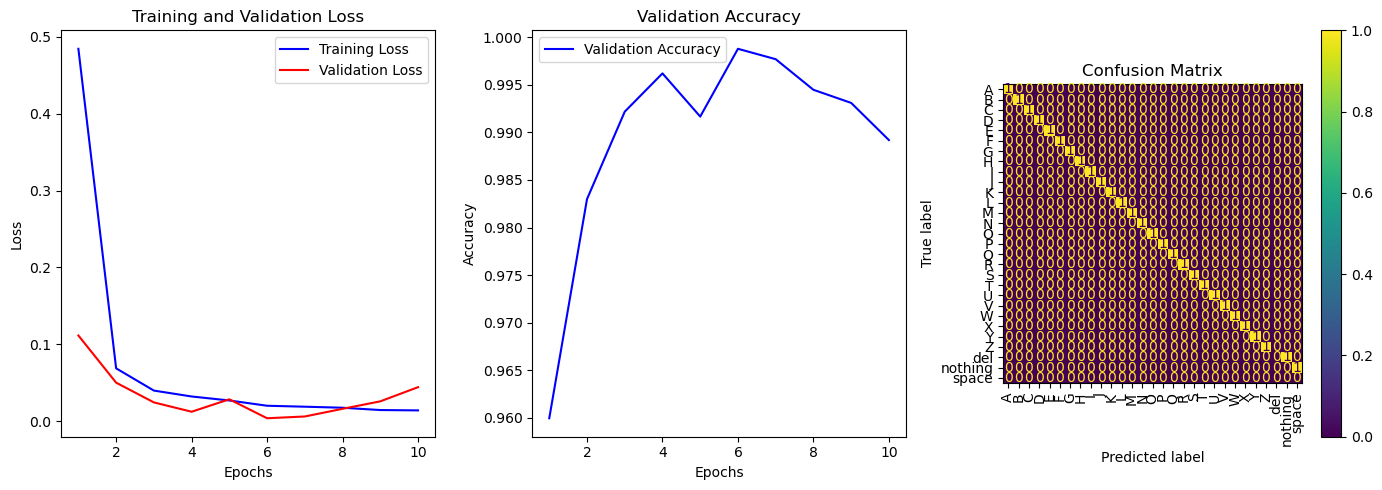

Test Accuracy: 0.9285714285714286


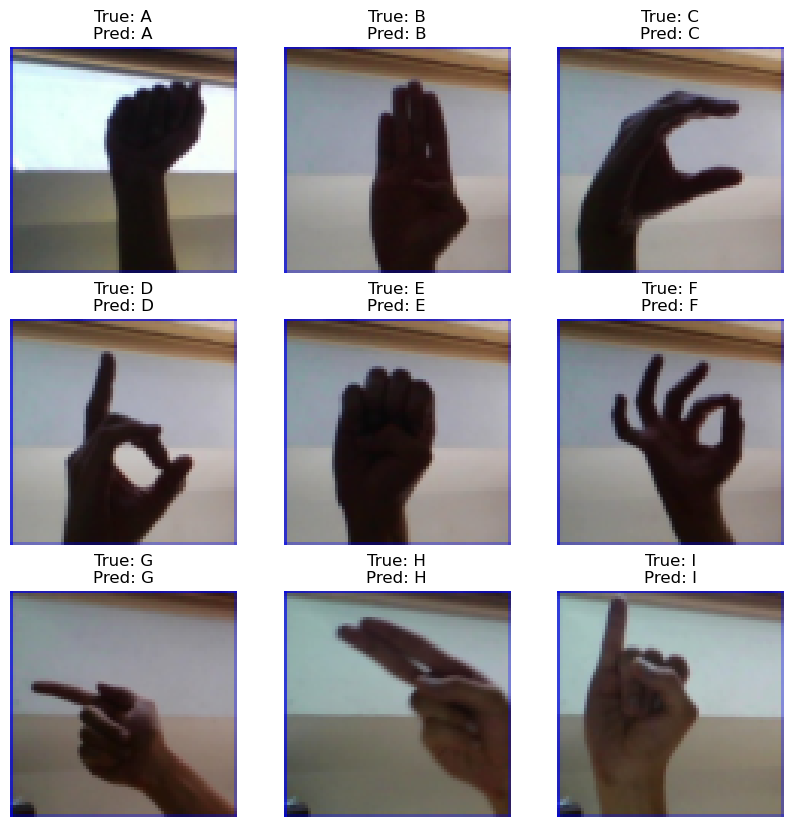

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths to data directories
train_data_dir = 'assets/asl/asl_alphabet_train'
test_data_dir = 'assets/asl/asl_alphabet_test'

# Data transformations
transform = transforms.Compose([
    transforms.Resize((75, 75)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load datasets
train_dataset = ImageFolder(root=train_data_dir, transform=transform)
test_dataset = ImageFolder(root=test_data_dir, transform=transform)

# Split training dataset into training and validation
train_indices, val_indices = train_test_split(range(len(train_dataset)), test_size=0.2, stratify=train_dataset.targets)
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 9 * 9, 512)
        self.fc2 = nn.Linear(512, 29)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 9 * 9)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = ASLClassifier()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

# Lists to store losses and accuracies
train_losses = []
val_losses = []
val_accuracies = []

# Training and validation loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}")

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plotting
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Testing and Confusion Matrix
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=train_dataset.classes)
disp.plot(ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(f"Test Accuracy: {correct / total}")

# Save the model
torch.save(model.state_dict(), 'asl_classifier.pth')

# Plot some sample predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for j in range(9):
            if i * batch_size + j >= len(test_dataset):
                break
            ax = axes[j // 3, j % 3]
            img = images[j].cpu().permute(1, 2, 0) * 0.5 + 0.5  # Unnormalize
            ax.imshow(img)
            ax.set_title(f"True: {train_dataset.classes[labels[j]]}\nPred: {train_dataset.classes[predicted[j]]}")
            ax.axis('off')
        if i == 0:
            break
plt.show()


Epoch 1/10, Training Loss: 0.8413701523240955
Epoch 1/10, Validation Loss: 0.4103377204497947, Validation Accuracy: 0.8720114942528736
Epoch 2/10, Training Loss: 0.1906028976218625
Epoch 2/10, Validation Loss: 0.20645119243657545, Validation Accuracy: 0.9398850574712644
Epoch 3/10, Training Loss: 0.1071652644983996
Epoch 3/10, Validation Loss: 0.1903514234290924, Validation Accuracy: 0.9489655172413793
Epoch 4/10, Training Loss: 0.07413629055189119
Epoch 4/10, Validation Loss: 0.09522737612560912, Validation Accuracy: 0.97
Epoch 5/10, Training Loss: 0.05419608033777364
Epoch 5/10, Validation Loss: 0.11967435123819194, Validation Accuracy: 0.9648275862068966
Epoch 6/10, Training Loss: 0.043061745555498694
Epoch 6/10, Validation Loss: 0.0911348120901975, Validation Accuracy: 0.9754022988505747
Epoch 7/10, Training Loss: 0.03332621059620662
Epoch 7/10, Validation Loss: 0.048370606497722776, Validation Accuracy: 0.9847126436781609
Epoch 8/10, Training Loss: 0.0343310972144001
Epoch 8/10, V

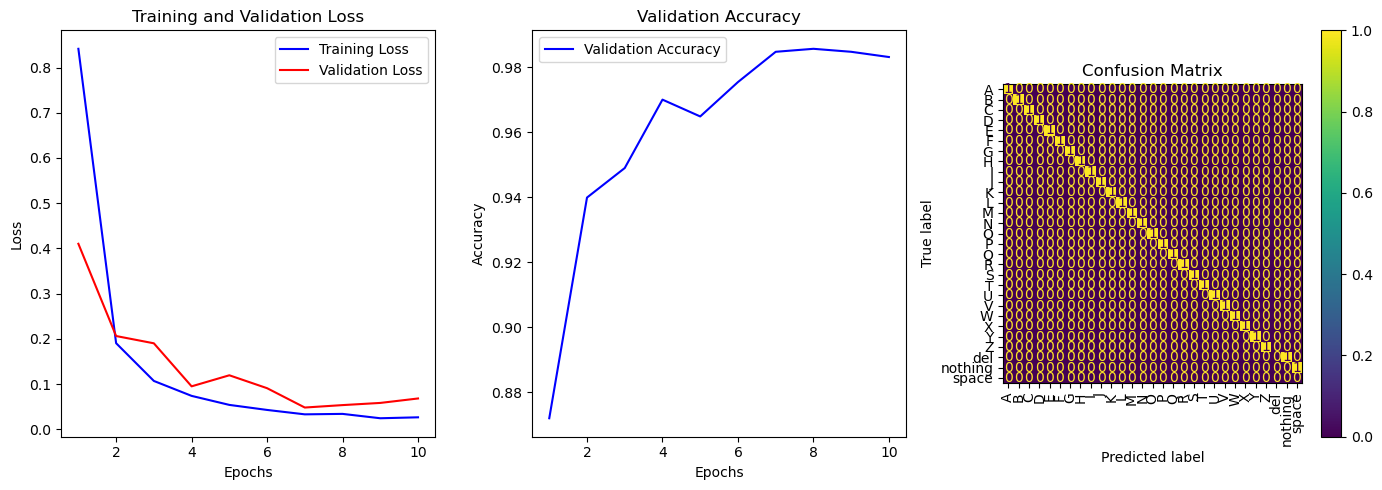

Test Accuracy: 0.9285714285714286


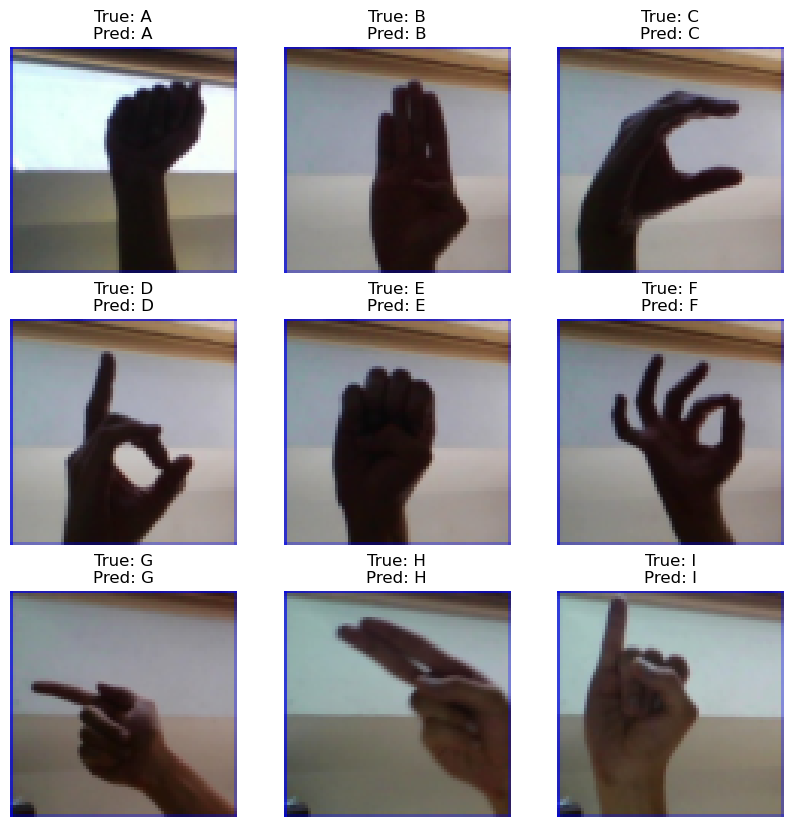

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths to data directories
train_data_dir = 'assets/asl/asl_alphabet_train'
test_data_dir = 'assets/asl/asl_alphabet_test'

# Data transformations
transform = transforms.Compose([
    transforms.Resize((75, 75)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load datasets
train_dataset = ImageFolder(root=train_data_dir, transform=transform)
test_dataset = ImageFolder(root=test_data_dir, transform=transform)

# Split training dataset into training and validation
train_indices, val_indices = train_test_split(range(len(train_dataset)), test_size=0.2, stratify=train_dataset.targets)
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 37 * 37, 29)  # Adjust the input size for the new architecture

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 32 * 37 * 37)
        x = self.fc1(x)
        return x

# Initialize the model
model = ASLClassifier()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

# Lists to store losses and accuracies
train_losses = []
val_losses = []
val_accuracies = []

# Training and validation loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}")

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plotting
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Testing and Confusion Matrix
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=train_dataset.classes)
disp.plot(ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(f"Test Accuracy: {correct / total}")

# Save the model
torch.save(model.state_dict(), 'asl_classifier.pth')

# Plot some sample predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for j in range(9):
            if i * batch_size + j >= len(test_dataset):
                break
            ax = axes[j // 3, j % 3]
            img = images[j].cpu().permute(1, 2, 0) * 0.5 + 0.5  # Unnormalize
            ax.imshow(img)
            ax.set_title(f"True: {train_dataset.classes[labels[j]]}\nPred: {train_dataset.classes[predicted[j]]}")
            ax.axis('off')
        if i == 0:
            break
plt.show()


Epoch 1/10, Training Loss: 0.6564995706042853
Epoch 1/10, Validation Loss: 0.1975830480360481, Validation Accuracy: 0.9362643678160919
Epoch 2/10, Training Loss: 0.10872170870556314
Epoch 2/10, Validation Loss: 0.1157299953064306, Validation Accuracy: 0.961551724137931
Epoch 3/10, Training Loss: 0.05491401835941528
Epoch 3/10, Validation Loss: 0.07017302084611454, Validation Accuracy: 0.977183908045977
Epoch 4/10, Training Loss: 0.038937841783085
Epoch 4/10, Validation Loss: 0.04881210952637904, Validation Accuracy: 0.9840229885057471
Epoch 5/10, Training Loss: 0.026712166267207484
Epoch 5/10, Validation Loss: 0.034388443843460986, Validation Accuracy: 0.9894827586206897
Epoch 6/10, Training Loss: 0.021531606755415433
Epoch 6/10, Validation Loss: 0.07283399531004708, Validation Accuracy: 0.9805172413793104
Epoch 7/10, Training Loss: 0.01940174272210734
Epoch 7/10, Validation Loss: 0.0642021230452803, Validation Accuracy: 0.9813793103448276
Epoch 8/10, Training Loss: 0.00953929664463420

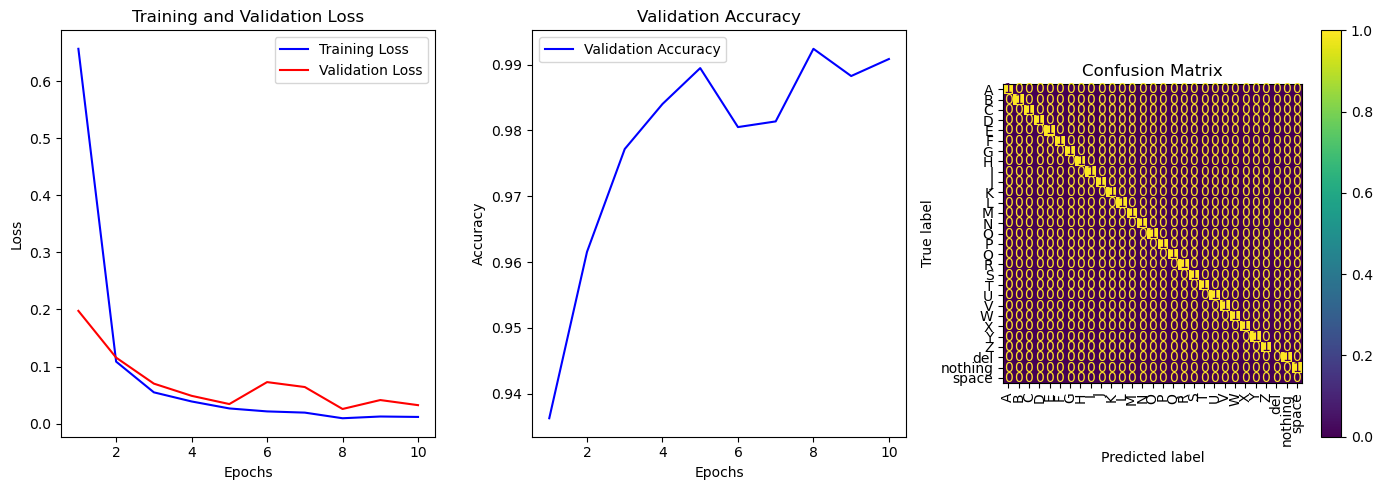

Test Accuracy: 0.9285714285714286


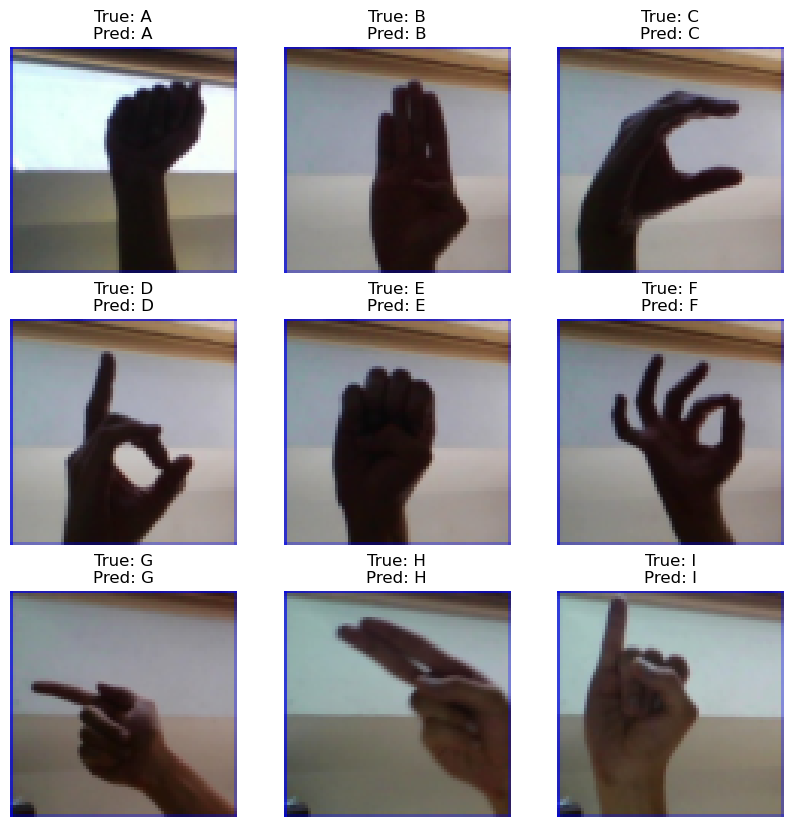

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths to data directories
train_data_dir = 'assets/asl/asl_alphabet_train'
test_data_dir = 'assets/asl/asl_alphabet_test'

# Data transformations
transform = transforms.Compose([
    transforms.Resize((75, 75)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load datasets
train_dataset = ImageFolder(root=train_data_dir, transform=transform)
test_dataset = ImageFolder(root=test_data_dir, transform=transform)

# Split training dataset into training and validation
train_indices, val_indices = train_test_split(range(len(train_dataset)), test_size=0.2, stratify=train_dataset.targets)
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 37 * 37, 29)  # Adjust the input size for the new architecture

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 37 * 37)
        x = self.fc1(x)
        return x

# Initialize the model
model = ASLClassifier()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

# Lists to store losses and accuracies
train_losses = []
val_losses = []
val_accuracies = []

# Training and validation loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}")

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plotting
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Testing and Confusion Matrix
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=train_dataset.classes)
disp.plot(ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(f"Test Accuracy: {correct / total}")

# Save the model
torch.save(model.state_dict(), 'asl_classifier.pth')

# Plot some sample predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for j in range(9):
            if i * batch_size + j >= len(test_dataset):
                break
            ax = axes[j // 3, j % 3]
            img = images[j].cpu().permute(1, 2, 0) * 0.5 + 0.5  # Unnormalize
            ax.imshow(img)
            ax.set_title(f"True: {train_dataset.classes[labels[j]]}\nPred: {train_dataset.classes[predicted[j]]}")
            ax.axis('off')
        if i == 0:
            break
plt.show()


Epoch 1/25, Training Loss: 0.43381448331995515
Epoch 1/25, Validation Loss: 0.05573916921821365, Validation Accuracy: 0.9818965517241379
Epoch 2/25, Training Loss: 0.05904587291025867
Epoch 2/25, Validation Loss: 0.0615410868291185, Validation Accuracy: 0.9827011494252873
Epoch 3/25, Training Loss: 0.03838933870027741
Epoch 3/25, Validation Loss: 0.020638810068882078, Validation Accuracy: 0.9925862068965517
Epoch 4/25, Training Loss: 0.03160351577089491
Epoch 4/25, Validation Loss: 0.018399947284632723, Validation Accuracy: 0.9947126436781609
Epoch 5/25, Training Loss: 0.021852824196559553
Epoch 5/25, Validation Loss: 0.005146204690521033, Validation Accuracy: 0.9986206896551724
Epoch 6/25, Training Loss: 0.02339139580383266
Epoch 6/25, Validation Loss: 0.03422311025197523, Validation Accuracy: 0.991551724137931
Epoch 7/25, Training Loss: 0.016107321161795876
Epoch 7/25, Validation Loss: 0.11798713588167269, Validation Accuracy: 0.9704597701149426
Epoch 8/25, Training Loss: 0.015379834

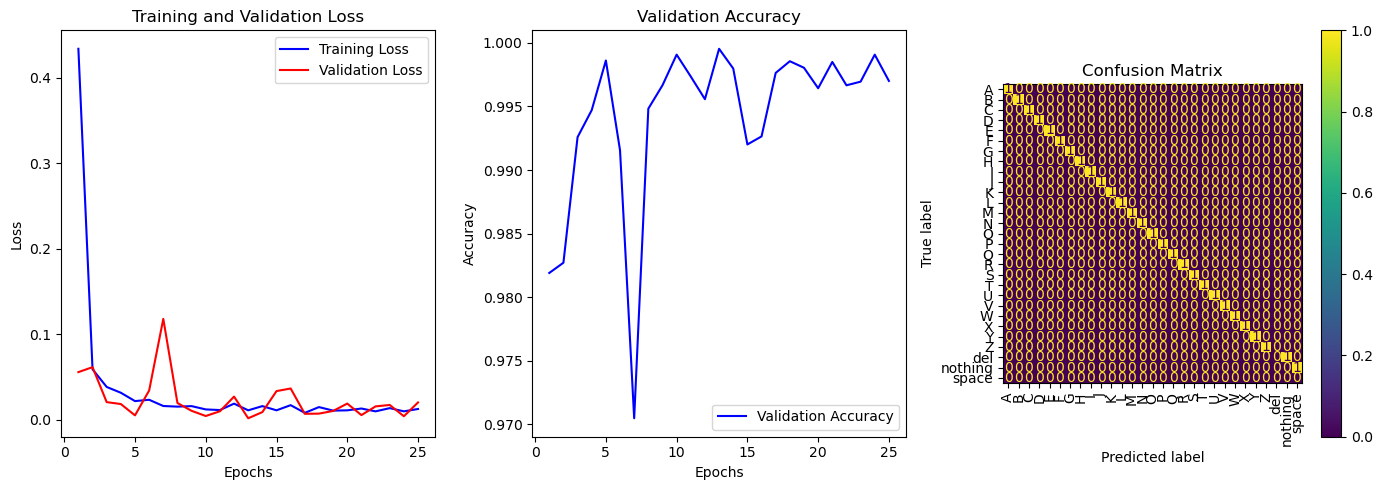

Test Accuracy: 0.9285714285714286


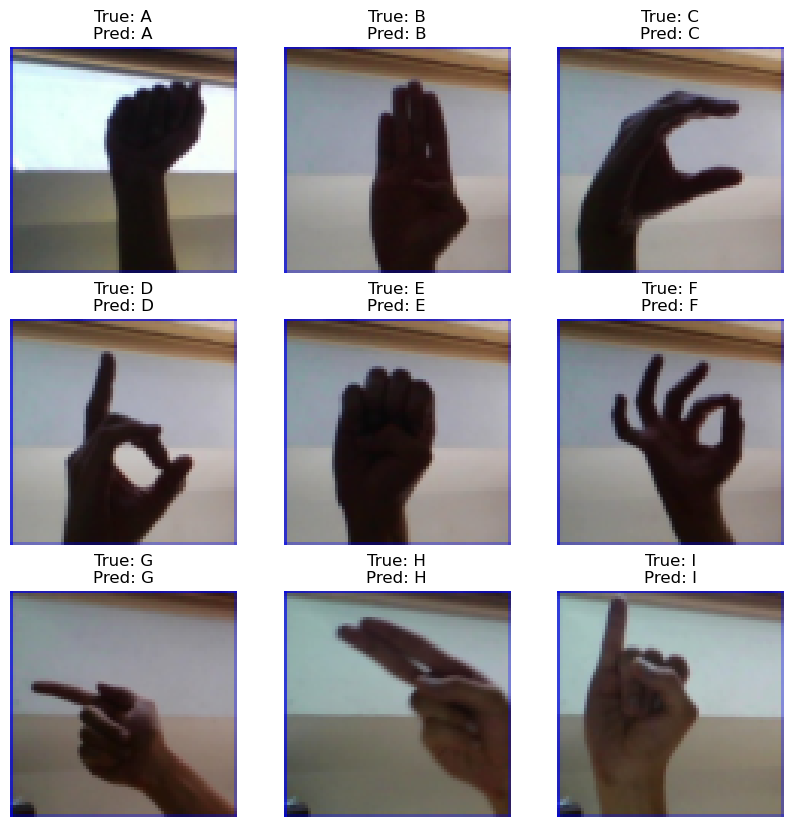

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Paths to data directories
train_data_dir = 'assets/asl/asl_alphabet_train'
test_data_dir = 'assets/asl/asl_alphabet_test'

# Data transformations
transform = transforms.Compose([
    transforms.Resize((75, 75)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load datasets
train_dataset = ImageFolder(root=train_data_dir, transform=transform)
test_dataset = ImageFolder(root=test_data_dir, transform=transform)

# Split training dataset into training and validation
train_indices, val_indices = train_test_split(range(len(train_dataset)), test_size=0.2, stratify=train_dataset.targets)
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
class ASLClassifier(nn.Module):
    def __init__(self):
        super(ASLClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 9 * 9, 512)
        self.fc2 = nn.Linear(512, 29)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 9 * 9)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = ASLClassifier()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25

# Lists to store losses and accuracies
train_losses = []
val_losses = []
val_accuracies = []

# Training and validation loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}")

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plotting
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Testing and Confusion Matrix
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=train_dataset.classes)
disp.plot(ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(f"Test Accuracy: {correct / total}")

# Save the model
torch.save(model.state_dict(), 'asl_classifier.pth')

# Plot some sample predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for j in range(9):
            if i * batch_size + j >= len(test_dataset):
                break
            ax = axes[j // 3, j % 3]
            img = images[j].cpu().permute(1, 2, 0) * 0.5 + 0.5  # Unnormalize
            ax.imshow(img)
            ax.set_title(f"True: {train_dataset.classes[labels[j]]}\nPred: {train_dataset.classes[predicted[j]]}")
            ax.axis('off')
        if i == 0:
            break
plt.show()

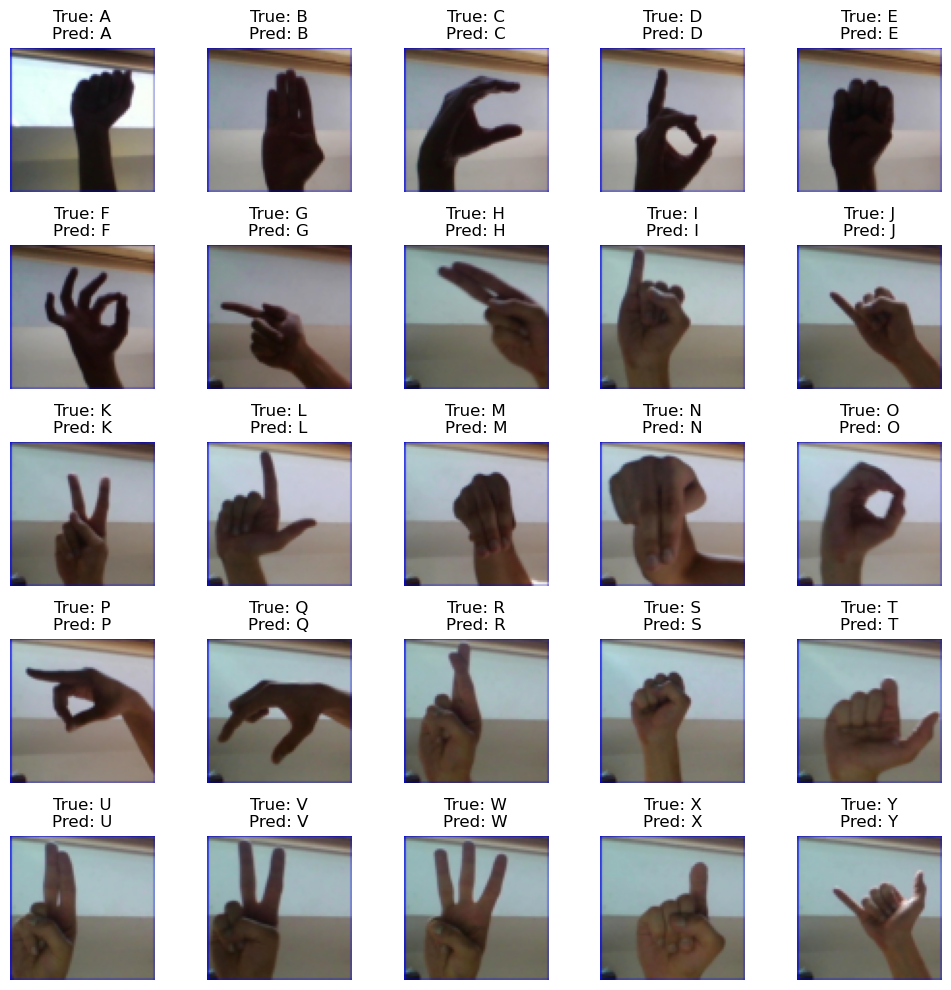

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for j in range(25):
            if i * batch_size + j >= len(test_dataset):
                break
            ax = axes[j // 5, j % 5]
            img = images[j].cpu().permute(1, 2, 0) * 0.5 + 0.5  # Unnormalize
            ax.imshow(img)
            ax.set_title(f"True: {train_dataset.classes[labels[j]]}\nPred: {train_dataset.classes[predicted[j]]}")
            ax.axis('off')
        if i == 0:
            break
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

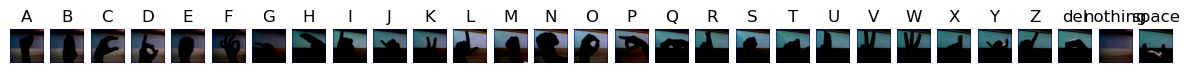

In [10]:
class_examples = {}
arr = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]
for i in range(29):
    class_examples[arr[i]] = arr[i]+"518.jpg"

# Iterate through the dataset to find one example per class
for img, label in train_dataset:
    if label not in class_examples:
        class_examples[label] = img
    if len(class_examples) == len(train_dataset.classes):
        break

# Define number of classes and create subplots
num_classes = len(class_examples)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

# Plot each example
for i in range(num_classes):
    ax = axes[i]
    img = class_examples[i].numpy()
    img = np.transpose(img, (1, 2, 0))  # Convert from CxHxW to HxWxC
    ax.imshow(img)
    ax.set_title(train_dataset.classes[i])
    ax.axis('off')

plt.show()

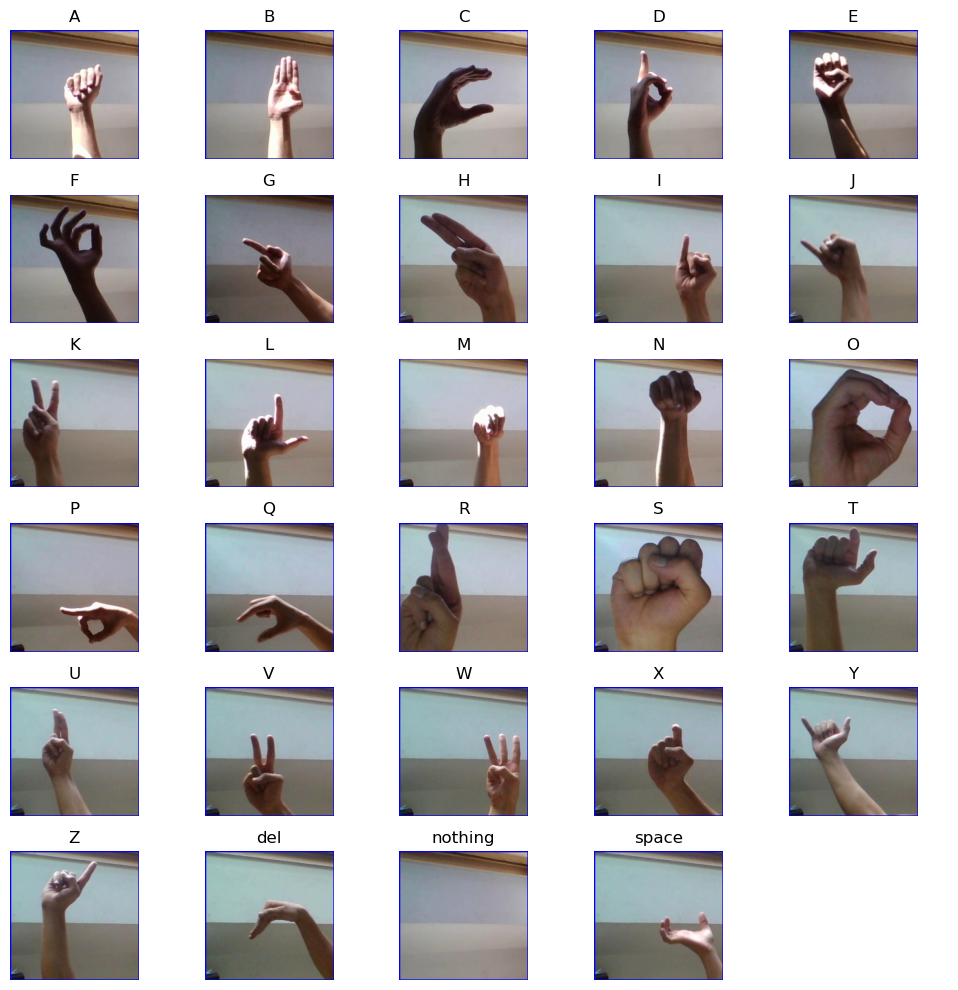

In [19]:
class_examples = {}
arr = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]
for i in range(29):
    class_examples[arr[i]] = plt.imread("assets/asl/asl_alphabet_train/"+arr[i]+"/"+arr[i]+"518.jpg")


fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,10))

for r in range(6):
    for c in range(5):
        i = r * 5 + c
        
        if i > 28:
            axes[r, c].axis('off')
            break
            
        axes[r, c].imshow(class_examples[arr[i]])
        axes[r, c].set_title(train_dataset.classes[i])
        axes[r, c].axis('off')
plt.tight_layout()
plt.show()